In [1]:
import keras
from keras.applications.vgg16 import VGG16
#from keras.applications.vgg19 import VGG19
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras import optimizers
import tensorflow as tf
from keras.utils.vis_utils import plot_model
import os, shutil
import matplotlib.pyplot as plt

In [2]:
print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


In [2]:
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150, 150, 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

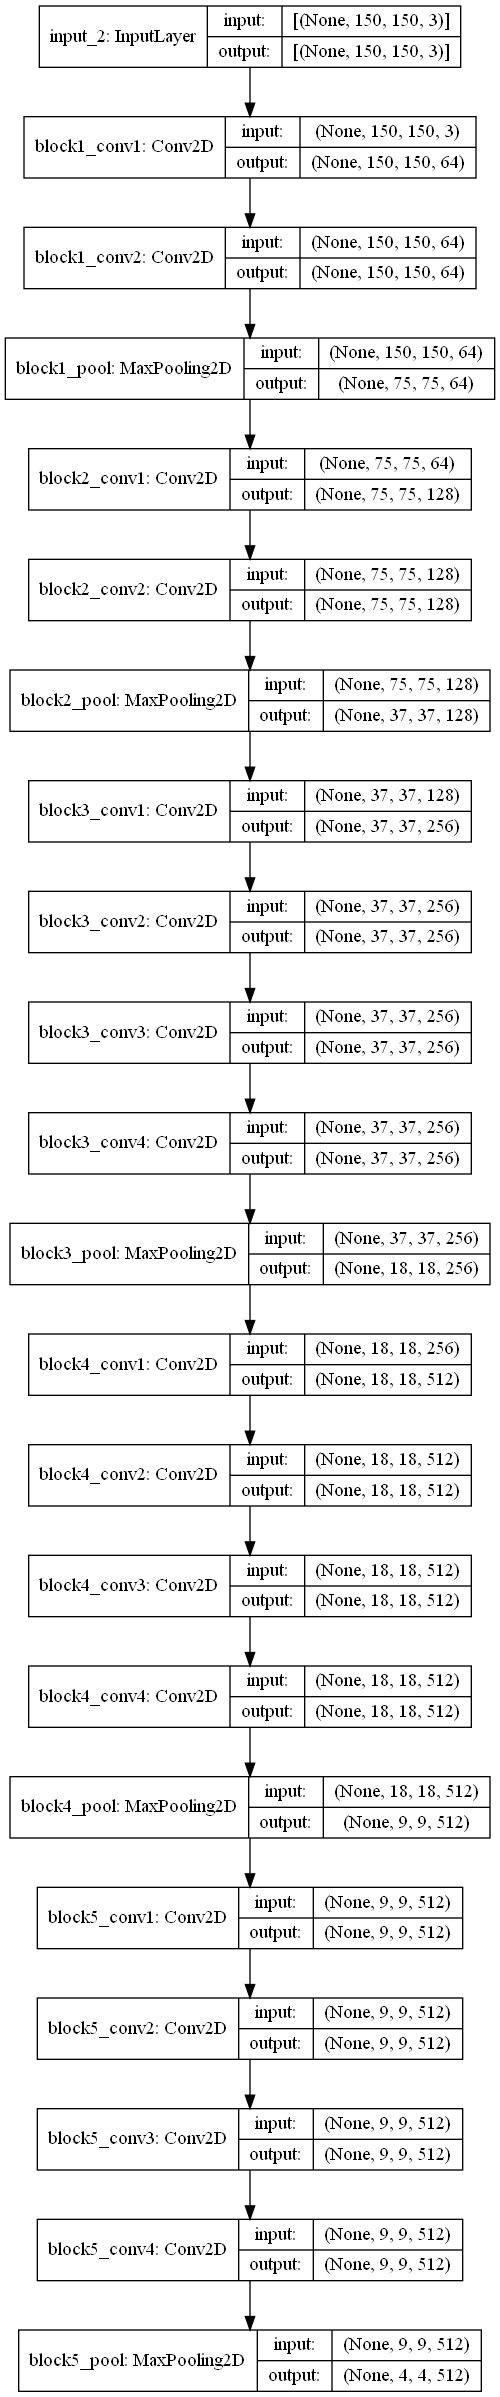

In [33]:
plot_model(conv_base, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [3]:
original_dataset_dir = 'original_images'
original_dataset_dir_board = 'original_images/board'
original_dataset_dir_noboard = 'original_images/noboard'

In [4]:
# The directory where we will store our train, test and validation images
base_dir = 'boardnoboardimages'


# Directories for our training,validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training rust pictures
train_board_dir = os.path.join(train_dir, 'board')

# Directory with our training norust pictures
train_noboard_dir = os.path.join(train_dir, 'noboard')

# Directory with our validation rust pictures
validation_board_dir = os.path.join(validation_dir, 'board')

# Directory with our validation norust pictures
validation_noboard_dir = os.path.join(validation_dir, 'noboard')

# Directory with our test rust pictures
test_board_dir = os.path.join(test_dir, 'board')

# Directory with our test norust pictures
test_noboard_dir = os.path.join(test_dir, 'noboard')

In [7]:
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)
os.mkdir(train_board_dir)
os.mkdir(train_noboard_dir)
os.mkdir(validation_board_dir)
os.mkdir(validation_noboard_dir)
os.mkdir(test_board_dir)
os.mkdir(test_noboard_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'boardnoboardimages'

In [5]:
# Copy first 15 rust images to train_rust_dir
fnames = ['M{}.jpg'.format(i) for i in range(1,15)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_board, fname)
    dst = os.path.join(train_board_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 5 rust images to validation_rust_dir
fnames = ['M{}.jpg'.format(i) for i in range(15, 20)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_board, fname)
    dst = os.path.join(validation_board_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 5 rust images to test_rust_dir
fnames = ['M{}.jpg'.format(i) for i in range(20, 25)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_board, fname)
    dst = os.path.join(test_board_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 15 non-rust images to train_norust_dir
fnames = ['nb{}.jpg'.format(i) for i in range(1,15)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_noboard, fname)
    dst = os.path.join(train_noboard_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 5 norust images to validation_norust_dir
fnames = ['nb{}.jpg'.format(i) for i in range(15, 20)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_noboard, fname)
    dst = os.path.join(validation_noboard_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 5 norust images to test_norust_dir
fnames = ['nb{}.jpg'.format(i) for i in range(20, 25)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_noboard, fname)
    dst = os.path.join(test_noboard_dir, fname)
    shutil.copyfile(src, dst)

In [4]:

print('total training board images:', len(os.listdir(train_board_dir)))
print('total training noboard images:', len(os.listdir(train_noboard_dir)))
print('total validation board images:', len(os.listdir(validation_board_dir)))
print('total validation noboard images:', len(os.listdir(validation_noboard_dir)))
print('total test board images:', len(os.listdir(test_board_dir)))
print('total test noboard images:', len(os.listdir(test_noboard_dir)))

total training board images: 14
total training noboard images: 14
total validation board images: 5
total validation noboard images: 5
total test board images: 5
total test noboard images: 5


In [5]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 22,122,049
Non-trainable params: 0
_________________________________________________________________


In [9]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [6]:
conv_base.trainable = False

In [11]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [7]:
base_dir = 'boardnoboardimages'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')

 #       save_to_dir='/home/anirban/rustnorust_b/images')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 28 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [8]:
print(train_generator.class_indices)

{'board': 0, 'noboard': 1}


In [9]:
from time import time
from keras.callbacks import TensorBoard
#callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.00001,patience=5,mode='min')]
tensorboard = keras.callbacks.TensorBoard(log_dir='/output/{}'.format(time()))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

#history = model.fit_generator(train_generator,epochs=15,validation_split=0.1,validation_steps=20,verbose=1,callbacks=[tensorboard])
history = model.fit_generator(train_generator,epochs=15,validation_data=train_generator,validation_steps=20,verbose=1,callbacks=[tensorboard])

c:\program files\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\program files\python38\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
7/7 [==============================] - 57s 2s/step - loss: 0.6963 - acc: 0.5480 - val_loss: 0.6020 - val_acc: 0.6786
Epoch 2/15
7/7 [==============================] - 4s 506ms/step - loss: 0.5123 - acc: 0.8751
Epoch 3/15
7/7 [==============================] - 4s 537ms/step - loss: 0.5285 - acc: 0.8090
Epoch 4/15
7/7 [==============================] - 4s 476ms/step - loss: 0.4575 - acc: 0.9425
Epoch 5/15
7/7 [==============================] - 4s 486ms/step - loss: 0.3617 - acc: 1.0000
Epoch 6/15
7/7 [==============================] - 4s 533ms/step - loss: 0.4194 - acc: 0.8603
Epoch 7/15
7/7 [==============================] - 4s 598ms/step - loss: 0.3295 - acc: 1.0000
Epoch 8/15
7/7 [==============================] - 4s 563ms/step - loss: 0.3106 - acc: 1.0000
Epoch 9/15
7/7 [==============================] - 4s 512ms/step - loss: 0.2801 - acc: 1.0000
Epoch 10/15
7/7 [==============================] - 4s 548ms/step - loss: 0.2526 - acc: 1.0000
Epoch 11/15
7/7 [=================

In [9]:
history.history

{'loss': [0.7202698588371277,
  0.6318766474723816,
  0.5450548529624939,
  0.4951745569705963,
  0.45723700523376465,
  0.4133475720882416,
  0.38221052289009094,
  0.3862167000770569,
  0.366802453994751,
  0.3010556399822235,
  0.2741651237010956,
  0.26552918553352356,
  0.23300838470458984,
  0.21434926986694336,
  0.19020141661167145],
 'acc': [0.4642857015132904,
  0.6071428656578064,
  0.8928571343421936,
  0.9642857313156128,
  0.9285714030265808,
  1.0,
  1.0,
  0.9642857313156128,
  0.9642857313156128,
  1.0,
  0.9642857313156128,
  1.0,
  1.0,
  1.0,
  0.9642857313156128],
 'val_loss': [0.5995212197303772],
 'val_acc': [0.7142857313156128]}

In [10]:
model.save('board_model.h5')

In [11]:
model = models.load_model('board_model.h5')

[[0.7827625]]
This is not a JB board image


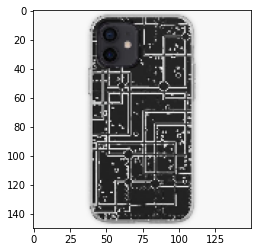

In [12]:
%matplotlib inline
img_path = 'boardnoboardimages/validation/noboard/nb17.jpg'

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

plt.imshow(img)
# Convert it to a Numpy array with shape (150, 150, 3)
test_x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
test_x = test_x.reshape((1,) + test_x.shape)
test_x = test_x.astype('float32') / 255
rust_prob = model.predict(test_x)
print(rust_prob)

if (rust_prob < 0.5):
    print("This is a JB board image")
else:
    print("This is not a JB board image")

In [15]:
%run ./project_defect_detection.ipynb

I am inside the other notebook
This is the second cell
